In [1]:
import os, pickle, sys
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import glob
from prettytable import PrettyTable

In [2]:
root='../results_release/ptcv'

alld = [f'ptcv_seed{i}' for i in range(0,6)]

allm = []
for dirs in alld:
    res = {}
    print(dirs)
    dirs = os.path.join(root,dirs)
    hl = ['exp']
    added_hl = False
    for fn in os.listdir(dirs):
        res[fn] = {}
        with open(os.path.join(dirs,fn),'rb') as f:
            ptcv=pickle.load(f)
        acc = []
        metrics = {}
        for d in ptcv:
            acc.append(d['valacc'])
            if len(hl) == 1:
                hl.extend(d['logmeasures'].keys())
            for m in d['logmeasures'].keys():
                if not m in metrics:
                    metrics[m] = []
                metrics[m].append(d['logmeasures'][m])
        if not added_hl:
            added_hl = True
            hl.append('samples')
            t = PrettyTable(hl)
        row=[fn]
        for m,v in metrics.items():
            cr = abs(stats.spearmanr(acc,v,nan_policy='omit').correlation)
            res[fn][m] = cr
            cr=round(cr,3)
            row.append(cr)
        row.append(len(acc))
        t.add_row(row)
    allm.append(res)
    print(t)

ptcv_seed0
+---------------------------------+-----------+-------+-------+--------+---------+-----------+---------+
|               exp               | grad_norm |  snip | grasp | fisher | synflow | jacob_cov | samples |
+---------------------------------+-----------+-------+-------+--------+---------+-----------+---------+
|    pred_ptcv_svhn_pretrain.p    |   0.707   | 0.576 | 0.382 | 0.168  |  0.747  |    0.34   |    49   |
|       pred_ptcv_cifar100.p      |   0.385   | 0.509 | 0.105 | 0.469  |  0.428  |   0.145   |    54   |
|         pred_ptcv_svhn.p        |   0.668   | 0.695 | 0.165 | 0.675  |  0.821  |   0.344   |    49   |
|  pred_ptcv_cifar100_pretrain.p  |   0.763   | 0.813 | 0.832 | 0.595  |  0.424  |   0.595   |    54   |
|       pred_ptcv_cifar10.p       |   0.409   | 0.521 | 0.127 | 0.471  |  0.456  |   0.046   |    56   |
|   pred_ptcv_cifar10_pretrain.p  |   0.639   |  0.71 | 0.434 | 0.464  |  0.416  |   0.646   |    56   |
|      pred_ptcv_ImageNet1k.p     |   0.563 

In [3]:
parsed = {}
for e in allm:
    for d,t in e.items():
        if not d in parsed.keys():
            parsed[d] = {}
        for m,c in t.items():
            if not m in parsed[d].keys():
                parsed[d][m] = []
            parsed[d][m].append(c)
labels = {
    'pred_ptcv_ImageNet1k.p': 'ImageNet1k',
    'pred_ptcv_cifar10.p': 'CIFAR-10',
    'pred_ptcv_cifar100.p': 'CIFAR100',
    'pred_ptcv_svhn.p': 'SVHN', 
    'pred_ptcv_ImageNet1k_pretrain.p': 'ImageNet1k',
    'pred_ptcv_cifar10_pretrain.p': 'CIFAR-10',
    'pred_ptcv_cifar100_pretrain.p': 'CIFAR100',
    'pred_ptcv_svhn_pretrain.p': 'SVHN', 
}
pattern = {
    'pred_ptcv_ImageNet1k.p': '*',
    'pred_ptcv_cifar10.p': '\\',
    'pred_ptcv_cifar100.p': '/',
    'pred_ptcv_svhn.p': 'o', 
    'pred_ptcv_ImageNet1k_pretrain.p': '*',
    'pred_ptcv_cifar10_pretrain.p': '\\',
    'pred_ptcv_cifar100_pretrain.p': '/',
    'pred_ptcv_svhn_pretrain.p': 'o', 
}
ps=[ "|" , "\\" , "/" , "+" , "-", ".", "*","x", "o", "O" ]

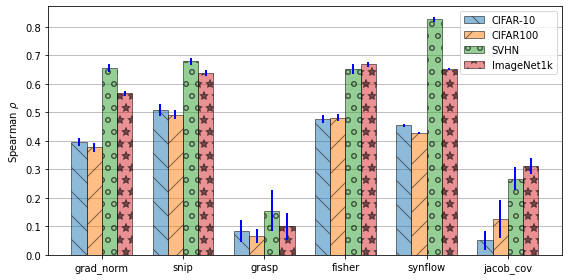

In [4]:
width = 0.75
fig, ax = plt.subplots(figsize=(8,4))
i=0
for exp in ['pred_ptcv_cifar10.p', 'pred_ptcv_cifar100.p', 'pred_ptcv_svhn.p', 'pred_ptcv_ImageNet1k.p']:
    #exp=exp.replace('.p', '_pretrain.p')
    bars = []
    for k,v in parsed[exp].items():
        v = np.array(v)
        m = np.mean(v)
        s = np.std(v)
        #print(k,m,s,v)
        bars.append((k,m,s))
    
    ys = [s[1] for s in bars]
    yerrs = [s[2] for s in bars]
    lbs = [s[0] for s in bars]
    xpos = np.arange(len(ys))
    i += 1
    
    ax.bar(xpos+(i-2.5)*width/4, ys, yerr=yerrs, width=width/4, align='center', alpha=0.5, label=labels[exp],
       hatch=pattern[exp], edgecolor='black', lw=1.,
       error_kw=dict(ecolor='blue', lw=2, capsize=1, capthick=2))
    ax.set_ylabel('Spearman $\\rho$')
    ax.set_xticks(xpos)
    ax.set_xticklabels(lbs)
    ax.yaxis.grid(True)
    ax.set_axisbelow(True)

# Save the figure and show
plt.legend(prop={'size': 10})
plt.tight_layout()
plt.savefig('ptcv.pdf')
plt.show()

In [5]:
pattern = {
    'grad_norm': '\\',
    'snip': '/',
    'grasp': '-',
    'fisher': '*',
    'synflow': 'o', 
    'jacob_cov': 'x' 
}
ps=[ "|" , "\\" , "/" , "+" , "-", ".", "*","x", "o", "O" ]

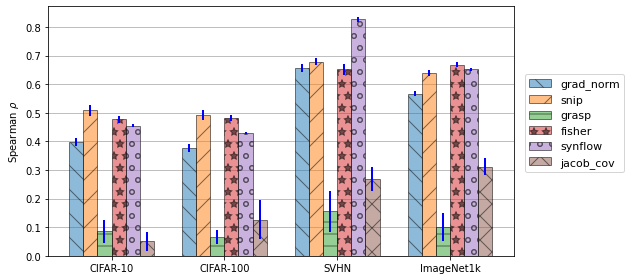

In [6]:
width = 0.75
fig, ax = plt.subplots(figsize=(9,4))
i=0
all_b = {}
for exp in ['pred_ptcv_cifar10.p', 'pred_ptcv_cifar100.p', 'pred_ptcv_svhn.p', 'pred_ptcv_ImageNet1k.p']:
    #exp=exp.replace('.p', '_pretrain.p')
    bars = []
    for k,v in parsed[exp].items():
        v = np.array(v)
        m = np.mean(v)
        s = np.std(v)
        #print(k,m,s,v)
        bars.append((k,m,s))
        if k not in all_b:
            all_b[k] = []
        all_b[k].append((labels[exp],m,s))
    print()
    

i=0
for k,v in all_b.items():
    
    ys = [s[1] for s in v]
    yerrs = [s[2] for s in v]
    lbs = [s[0] for s in v]
    xpos = np.arange(len(ys))
    
    ax.bar(xpos+(i-2.5)*width/6, ys, yerr=yerrs, width=width/6, align='center', alpha=0.5, label=k,
       hatch=pattern[k], edgecolor='black', lw=1.,
       error_kw=dict(ecolor='blue', lw=2, capsize=1, capthick=2))
    ax.set_ylabel('Spearman $\\rho$')
    ax.yaxis.grid(True)
    ax.set_axisbelow(True)
    i += 1

    
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['CIFAR-10', 'CIFAR-100', 'SVHN', 'ImageNet1k'])
# Save the figure and show
#plt.legend(loc='upper center', prop={'size': 11}, ncol=6, bbox_to_anchor=(0.5,1.15))
plt.legend(prop={'size': 11}, bbox_to_anchor=(1.25,0.75))
plt.tight_layout()
plt.savefig('ptcv_flip.pdf')
plt.show()